In [1]:
# [RDKitでRECAPを用いた分子のフラグメント化 | 化学の新しいカタチ](https://future-chem.com/rdkit-recap/)
# https://future-chem.com/rdkit-recap/

In [2]:
from rdkit import rdBase, Chem
from rdkit.Chem import AllChem, Draw, Recap
import pubchempy as pcp


RDKit WARNING: [08:34:34] Enabling RDKit 2019.09.2 jupyter extensions


In [3]:
celecoxib = pcp.get_compounds('celecoxib', 'name')
celecoxib = celecoxib[0]
sm = celecoxib.canonical_smiles
celecoxib = Chem.MolFromSmiles(sm)

# RECAP
decomp = Recap.RecapDecompose(celecoxib)

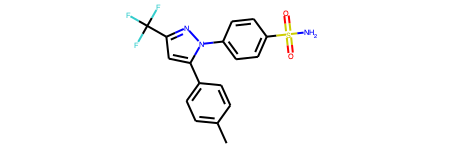

In [4]:
celecoxib

In [5]:
print(type(decomp))

<class 'rdkit.Chem.Recap.RecapHierarchyNode'>


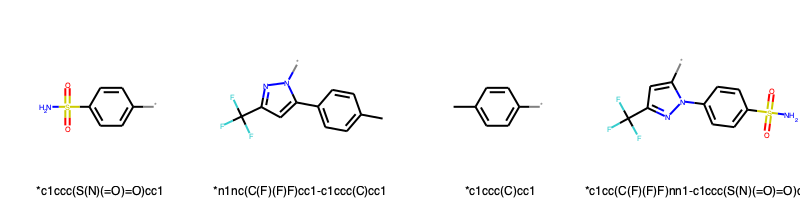

In [21]:
first_gen = [node.mol for node in decomp.children.values()]
Draw.MolsToGridImage(first_gen, molsPerRow=4, legends=[Chem.MolToSmiles(m) for m in first_gen])

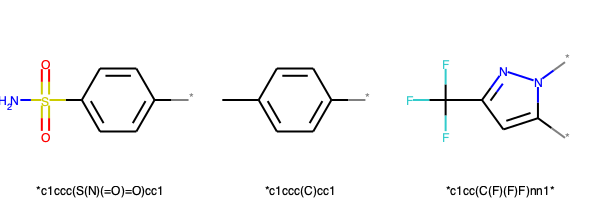

In [25]:
leaves = [leaf.mol for leaf in decomp.GetLeaves().values()]
Draw.MolsToGridImage(leaves, legends=[Chem.MolToSmiles(m) for m in leaves])

In [26]:
def get_leaves(recap_decomp, n=1):
    for child in recap_decomp.children.values():
        print('\t'*n + child.smiles)
        if child.children:
            get_leaves(child, n=n+1)

def get_recap_tree(mol):
    recap = Chem.Recap.RecapDecompose(mol)
    print(Chem.MolToSmiles(mol))
    get_leaves(recap)

get_recap_tree(celecoxib)

Cc1ccc(-c2cc(C(F)(F)F)nn2-c2ccc(S(N)(=O)=O)cc2)cc1
	*c1ccc(S(N)(=O)=O)cc1
	*n1nc(C(F)(F)F)cc1-c1ccc(C)cc1
		*c1ccc(C)cc1
		*c1cc(C(F)(F)F)nn1*
	*c1ccc(C)cc1
	*c1cc(C(F)(F)F)nn1-c1ccc(S(N)(=O)=O)cc1
		*c1cc(C(F)(F)F)nn1*
		*c1ccc(S(N)(=O)=O)cc1


In [41]:
print(type(decomp.children.values()))

<class 'dict_values'>


In [31]:
numbers = [0,1,2,3,4]
for i in numbers:
    print('\t'*i + "hello")

hello
	hello
		hello
			hello
				hello
